In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import discriminant_analysis
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [36]:
dataset= pd.read_csv("lung cancer.csv")
GENDER = "GENDER"
AGE = "AGE"
SMOKING = "SMOKING"
LUNG_CANCER = "LUNG_CANCER"
CHRONIC_DISEASE = "CHRONIC DISEASE"
data_df = pd.read_csv("lung cancer.csv")

for col in data_df.columns:
    if col != AGE:
        data_df[col] = data_df[col].astype('category').cat.codes      
data_df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [37]:
data_df['LUNG_CANCER'].value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

In [38]:
# Separate the data into people without lung cancer and those with it
no_data = data_df[data_df[LUNG_CANCER] == 0]
yes_data = data_df[data_df[LUNG_CANCER] == 1]

In [39]:
from sklearn.utils import resample

In [40]:
data_majority = data_df[data_df.LUNG_CANCER==1]
data_minority = data_df[data_df.LUNG_CANCER==0]
 
data_minority_upsampled = resample(data_minority, 
                                 replace=True,  
                                 n_samples=269, 
                                 random_state=4)

data = pd.concat([data_majority, data_minority_upsampled])
data['LUNG_CANCER'].value_counts()

1    270
0    269
Name: LUNG_CANCER, dtype: int64

In [41]:
#data_upsampled.to_csv('D:/upsampled.csv')

In [8]:
data.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.053034,0.013795,-0.101761,0.008924,-0.022488,-0.160542,-0.123299,0.152937,0.195022,0.487007,0.110961,-0.127003,0.106336,0.453347,0.113331
AGE,0.053034,1.000000,-0.067120,-0.039480,0.051928,0.125363,-0.035446,0.009101,-0.034332,0.138633,0.143110,0.191779,-0.033381,-0.004218,0.021997,0.166834
SMOKING,0.013795,-0.067120,1.000000,-0.072564,0.060021,-0.016181,-0.081117,0.039806,0.176385,-0.141425,0.006192,-0.160457,-0.009227,0.033272,0.116128,0.128004
YELLOW_FINGERS,-0.101761,-0.039480,-0.072564,1.000000,0.443188,0.152721,-0.071894,-0.293359,-0.106982,0.010794,-0.121288,0.154925,-0.146664,0.381276,0.014088,0.198507
ANXIETY,0.008924,0.051928,0.060021,0.443188,1.000000,0.122630,-0.044979,-0.218399,-0.126870,-0.236965,-0.012848,-0.139669,-0.373462,0.471913,-0.047375,0.158786
PEER_PRESSURE,-0.022488,0.125363,-0.016181,0.152721,0.122630,1.000000,0.143461,0.049814,0.022248,0.081947,0.049987,0.005754,-0.123383,0.268856,0.102634,0.311043
CHRONIC DISEASE,-0.160542,-0.035446,-0.081117,-0.071894,-0.044979,0.143461,1.000000,0.038425,0.216899,-0.053833,0.116194,-0.192224,0.066013,0.084499,-0.079913,0.244002
FATIGUE,-0.123299,0.009101,0.039806,-0.293359,-0.218399,0.049814,0.038425,1.000000,0.125596,0.153600,-0.100524,0.028123,0.491690,-0.119271,-0.032266,0.234971
ALLERGY,0.152937,-0.034332,0.176385,-0.106982,-0.126870,0.022248,0.216899,0.125596,1.000000,0.272138,0.420668,0.242412,0.060401,0.087579,0.300952,0.513200
WHEEZING,0.195022,0.138633,-0.141425,0.010794,-0.236965,0.081947,-0.053833,0.153600,0.272138,1.000000,0.353470,0.503504,0.188566,0.113846,0.257012,0.362466


<AxesSubplot:>

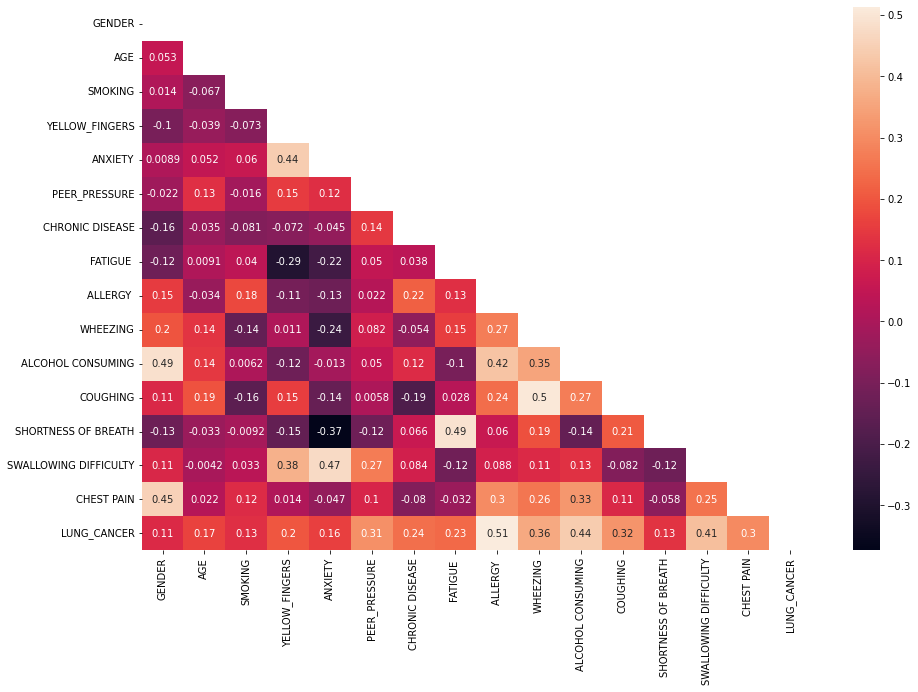

In [9]:
matrix = np.triu(data.corr())
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot=True, mask=matrix)

## Age

<AxesSubplot:title={'center':'Age vs. lung cancer'}, ylabel='Frequency'>

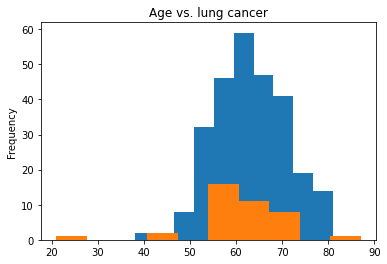

In [10]:
yes_data[AGE].plot(title="Age vs. lung cancer", kind="hist")
no_data[AGE].plot(kind="hist")

## Smoking

<AxesSubplot:title={'center':'Smoking vs. lung cancer'}>

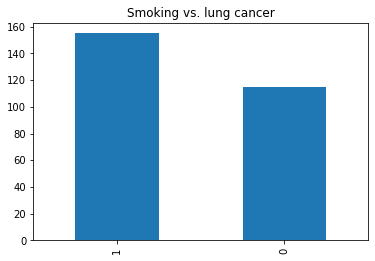

In [11]:
yes_data[SMOKING].value_counts().plot(title="Smoking vs. lung cancer", kind="bar")

<AxesSubplot:title={'center':'Non-smoking vs. lung cancer'}>

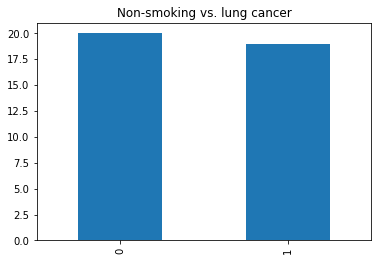

In [12]:
no_data[SMOKING].value_counts().plot(title="Non-smoking vs. lung cancer", kind="bar")

## Chronic Disease

<AxesSubplot:title={'center':'Chronic disease vs. lung cancer'}>

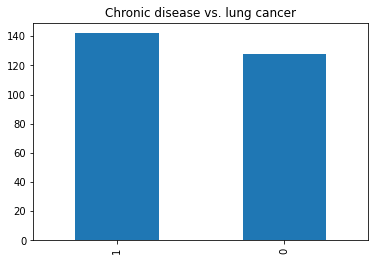

In [13]:
yes_data[CHRONIC_DISEASE].value_counts().plot(title="Chronic disease vs. lung cancer", kind="bar")

<AxesSubplot:title={'center':'Chronic disease vs. lung cancer'}>

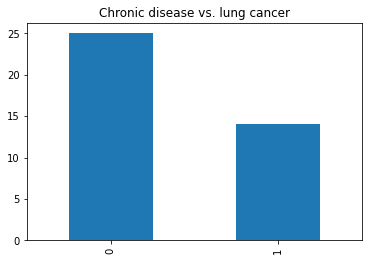

In [14]:
no_data[CHRONIC_DISEASE].value_counts().plot(title="Chronic disease vs. lung cancer", kind="bar")

# Part 2: Making Predictions

In [42]:
# Separate the data into training and validation sets
data_X = data.iloc[:, 0:15]
#data_X = preprocessing.scale(data_X) # Scaling helps LinearSVC converge
data_y = data.iloc[:, 15]
train_X, test_X, train_y, test_y = model_selection.train_test_split(data_X, data_y, test_size=0.2, random_state=0)

In [43]:
def run_classifiers(classifiers, train_X, train_y, test_X, test_y):
    """
    Fits each classifier to the training data and runs it on the test data.
    Prints out the training and test accuracies. 
    """
    results = [] # list of 3-tuples: (classifier name, train accuracy, test accuracy)
    

    
    for clf in classifiers:       
        # Run classifier on train and test data
        clf.fit(train_X, train_y)
        train_pred = clf.predict(train_X)       
        train_acc = metrics.accuracy_score(train_y, train_pred)
        
        test_pred = clf.predict(test_X)
        test_acc = metrics.accuracy_score(test_y, test_pred)
        
        # Print out misclassification metrics
        conf_mat = metrics.confusion_matrix(test_y, test_pred)   
        precision = conf_mat[1][1] / (conf_mat[1][1] + conf_mat[0][1])
        recall = conf_mat[1][1] / (conf_mat[1][1] + conf_mat[1][0])
        f1_score = 2 * ((precision * recall) / (precision + recall))

        print(f"{type(clf).__name__}")
        print('---------------------------------')
        print(f"Precision rate = {precision}")    
        print(f"Recall rate = {recall}")
        print(f"F1 score = {f1_score}\n")
        print(conf_mat)
        print('---------------------------------')

        # Store results
        results.append( ((type(clf).__name__), train_acc, test_acc) )
        
    return results

In [27]:
classifiers = [
    linear_model.LogisticRegression(solver="lbfgs", max_iter=200),
    ensemble.AdaBoostClassifier(),
    svm.SVC(C=1,gamma=1, kernel='rbf'),
    RandomForestClassifier(max_depth=5)
]
results = run_classifiers(classifiers, train_X, train_y, test_X, test_y)
results

C:\Users\manin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
---------------------------------
Precision rate = 0.8421052631578947
Recall rate = 0.9056603773584906
F1 score = 0.8727272727272727

[[46  9]
 [ 5 48]]
---------------------------------
AdaBoostClassifier
---------------------------------
Precision rate = 0.9245283018867925
Recall rate = 0.9245283018867925
F1 score = 0.9245283018867925

[[51  4]
 [ 4 49]]
---------------------------------
SVC
---------------------------------
Precision rate = 0.9636363636363636
Recall rate = 1.0
F1 score = 0.9814814814814815

[[53  2]
 [ 0 53]]
---------------------------------
RandomForestClassifier
---------------------------------
Precision rate = 0.8928571428571429
Recall rate = 0.9433962264150944
F1 score = 0.9174311926605505

[[49  6]
 [ 3 50]]
---------------------------------


[('LogisticRegression', 0.91415313225058, 0.8703703703703703),
 ('AdaBoostClassifier', 0.9651972157772621, 0.9259259259259259),
 ('SVC', 0.9976798143851509, 0.9814814814814815),
 ('RandomForestClassifier', 0.9443155452436195, 0.9166666666666666)]

In [28]:
classifier_names = [clf[0] for clf in results]
train_acc = [clf[1] for clf in results]
test_acc = [clf[2] for clf in results]

for i in range(len(classifier_names)):
    print(classifier_names[i],train_acc[i])

LogisticRegression 0.91415313225058
AdaBoostClassifier 0.9651972157772621
SVC 0.9976798143851509
RandomForestClassifier 0.9443155452436195


In [29]:
Accuracy_df = pd.DataFrame(test_acc,classifier_names)
Accuracy_df.reset_index(inplace = True)

In [30]:
Accuracy_df

,index,0
0,LogisticRegression,0.870370
1,AdaBoostClassifier,0.925926
2,SVC,0.981481
3,RandomForestClassifier,0.916667


In [31]:
Accuracy_df.columns = ['Algorithm', 'Accuracy']
Accuracy_df

,Algorithm,Accuracy
0,LogisticRegression,0.870370
1,AdaBoostClassifier,0.925926
2,SVC,0.981481
3,RandomForestClassifier,0.916667


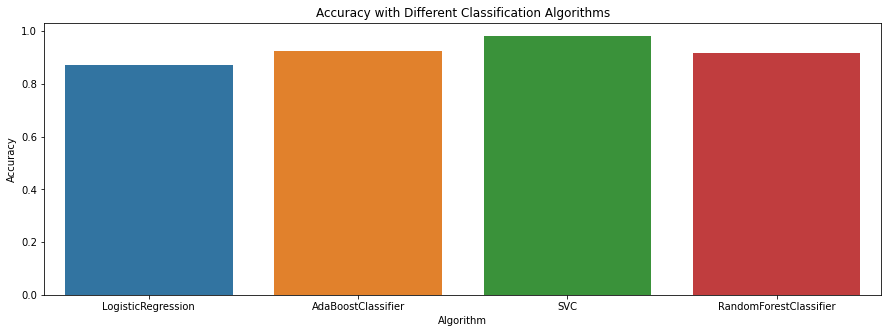

In [32]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Algorithm", y="Accuracy", data = Accuracy_df).set(title='Accuracy with Different Classification Algorithms')

In [23]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(svm.SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False),train_X,train_y,cv=4,scoring="accuracy").mean())

0.986024575977847


# Parameters SVM
C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(train_X, train_y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.586 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.547 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.581 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.581 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.874 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.756 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.767 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.826 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.736 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.988 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.930 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.943 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.942 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.919 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.953 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.860 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.908 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.907 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.849 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.895 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.849 total time=   0.0s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [19]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)
